# Final Dechathon Niamsa-ard 64110094

## Final-1 and Tesor Fusion part has been already run in other file

## Final 1

### Import necessary libraries

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Lambda, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import keras_tuner as kt
#from keras_tuner import HyperParameters
import os
import librosa
import soundfile as sf
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import sys
import librosa.display

%matplotlib inline
from IPython.display import Image
PATH = "/Users/User/Desktop/Deep learning codes/"

2023-11-05 15:12:07.967936: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 15:12:07.967973: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 15:12:07.967998: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 15:12:07.973818: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Set random seed and variables

In [ ]:
#### block 1 ####
#### set random seed for reproducibility ####
np.random.seed(1234)
tf.random.set_seed(1234)

ini_1 = initializers.RandomNormal(stddev = 0.01)
ini_2 = initializers.GlorotNormal(seed = 1234)
ini_3 = initializers.GlorotUniform(seed = 1234)
ini_4 = initializers.HeNormal()
ini_5 = initializers.HeUniform()
ini_6 = initializers.Constant(value = 0.5)
ini_7 = initializers.TruncatedNormal(mean = 0.0 ,stddev = 0.05)
ini_8 = initializers.VarianceScaling()

act_1 = 'tanh'
act_2 = 'relu'
act_3 = 'sigmoid'
act_4 = 'linear'
act_5 = 'softmax'
act_6 = 'elu'
act_7 = 'swish'
act_8 = 'softmax'


### Initialize Hyperparameters

In [ ]:
#### block 2 ####
#### initialize hyperparameters ####
learning_rate = 0.01
batch_size = 32
num_epochs = 200

input_img_heg = 28 # dimension of original images
input_img_wid = 28

# use them for demensionality reduction (dowm sizing) of db spectrograms
component_time = 6 # these components must be smaller than the samllest number of time and freqency of original spectrograms.
component_freq = 6 # component_freq =< component_time


### MNIST data

training images' shape after normalization: (54000, 28, 28)
validation images' shape after normalization: (6000, 28, 28)
test images' shape after normalization: (10000, 28, 28)
........................................................................
training images' type after normalization: <class 'numpy.ndarray'>
validation images' type after normalization: <class 'numpy.ndarray'>
test images' type after normalization: <class 'numpy.ndarray'>
........................................................................


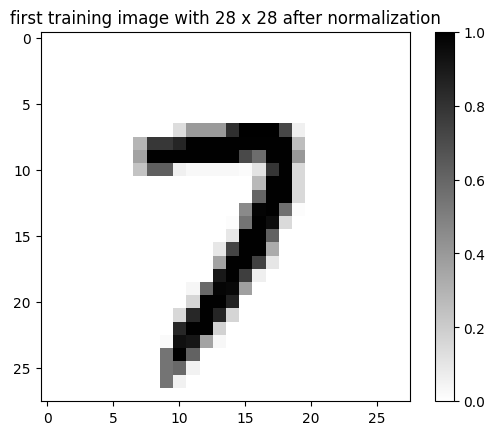

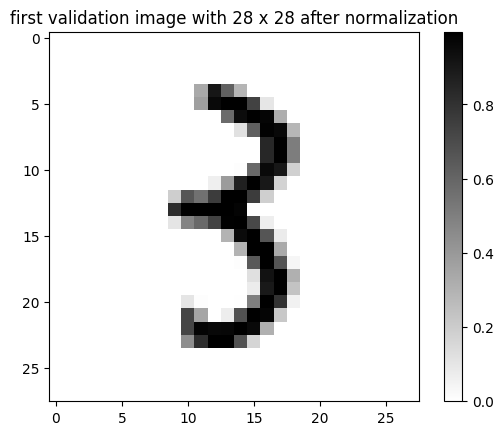

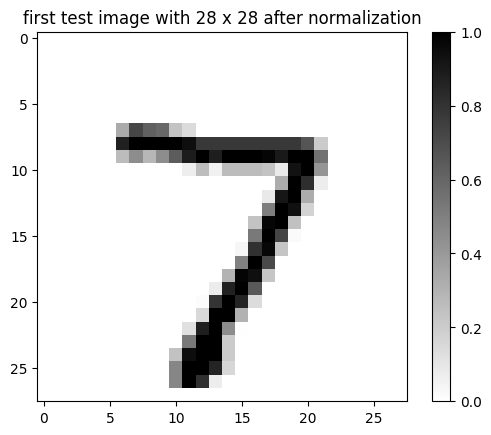

In [ ]:
#### block 3 ####
#### MNIST data preperation ####

(x_train, y_train), (x_test, y_test) = mnist.load_data() # Load MNIST data

x_train = x_train.astype('float32') / 255.0 # normalize MNIST data between 0 and 1
x_test = x_test.astype('float32') / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 0) # split the training set into training and validation sets (9:1)

print(f"training images' shape after normalization: {x_train.shape}")
print(f"validation images' shape after normalization: {x_val.shape}")
print(f"test images' shape after normalization: {x_test.shape}")
print('........................................................................')
print(f"training images' type after normalization: {type(x_train)}")
print(f"validation images' type after normalization: {type(x_val)}")
print(f"test images' type after normalization: {type(y_test)}")
print('........................................................................')

# draw images with 28 x 28 before resizing
first_channel_tr = x_train[0] # first channel of x_train (index = 0)
plt.imshow(first_channel_tr, cmap = 'gray_r')
plt.title('first training image with 28 x 28 after normalization')
plt.colorbar()
plt.show()

first_channel_val = x_val[0] # first channel of x_val (index = 0)
plt.imshow(first_channel_val, cmap = 'gray_r')
plt.title('first validation image with 28 x 28 after normalization')
plt.colorbar()
plt.show()

first_channel_test = x_test[0] # first channel of x_test (index = 0)
plt.imshow(first_channel_test, cmap = 'gray_r')
plt.title('first test image with 28 x 28 after normalization')
plt.colorbar()
plt.show()


### Prepare the training set of audio MNIST

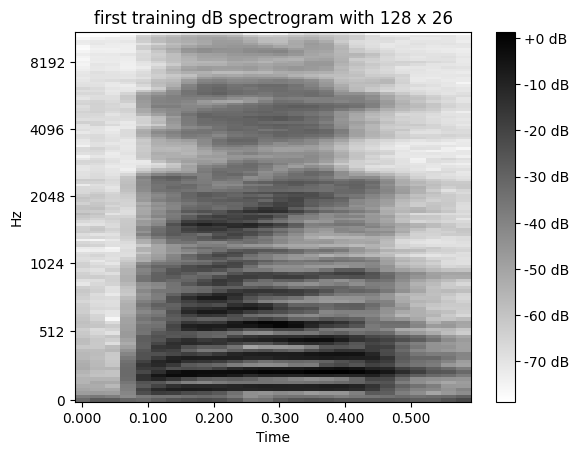

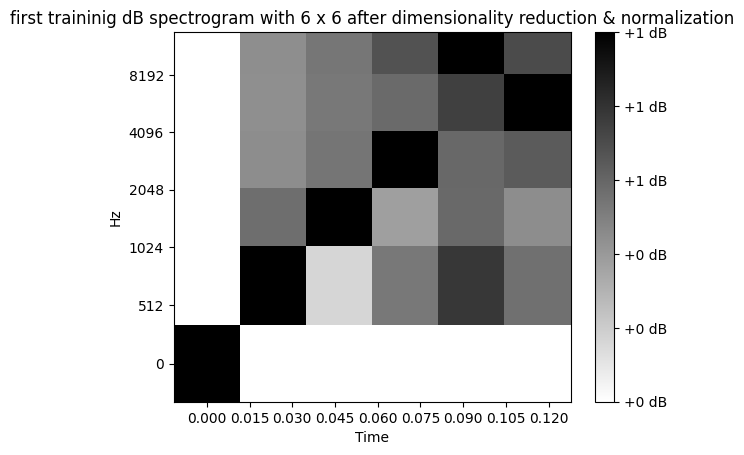

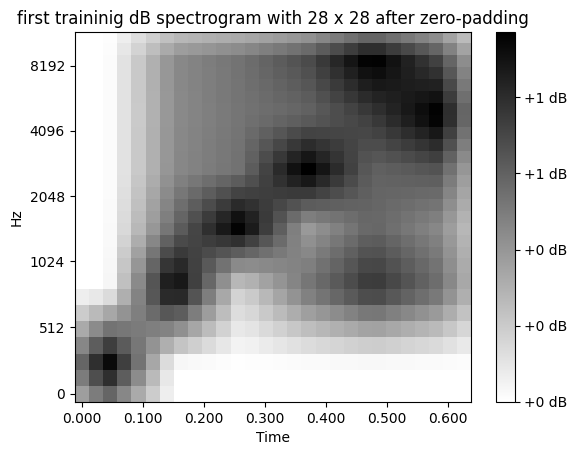

2023-11-05 15:16:39.966158: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79114 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:09:00.0, compute capability: 8.0
2023-11-05 15:16:39.967890: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 44005 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:46:00.0, compute capability: 8.0
2023-11-05 15:16:39.969394: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 44005 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:85:00.0, compute capability: 8.0
2023-11-05 15:16:39.971457: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 79114 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-80GB, pci bu

[0.52846431 0.73208564 0.84437063 0.92649745 0.95321917 0.96432862]
[0.52846431 0.73208564 0.84437063 0.92649745 0.95321917 0.96432862]


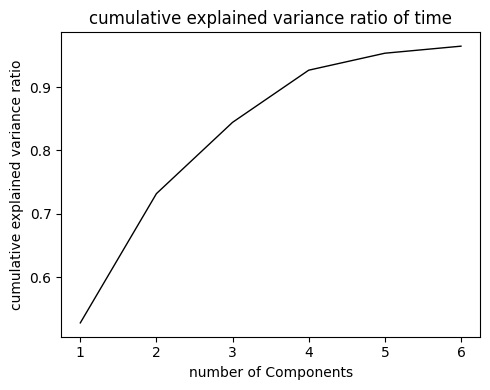

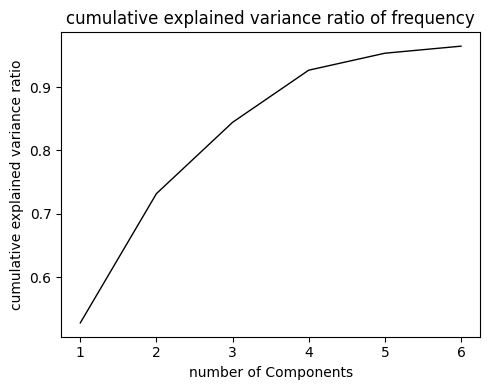

number of components to retain critical features for the time domain: 5
number of components to retain critical features for the frequency domain: 5


In [ ]:
#### block 4 ####
#### audio MNIST train data preperation ####

# data_dir_au = r'D:\Song\University\대학강의\Home Assignment & Project\Pysics-informed machine learning\MNIST data\30000 Audios\Training'
data_dir_au = r'/home/deepapp01/audio_dataset/70000_train_test/train' # path to the subdirectory before '0-9'
sub_dir = os.listdir(data_dir_au) # List all target subdirectories of '0-9'

x_train_sp_db = [] # initialize empty lists for dB sepctrograms and their corresponding labels
y_train_sp_db = []

x_train_sp_db_pca_nor = [] # initialize empty lists for dB sepctrograms and their corresponding labels after dimension reduction and normalization
y_train_sp_db_pca_nor = [] # 'pca' stands for 'Principal Component Analysis'

x_train_sp_db_pca_nor_pad = [] # initialize empty lists for dB sepctrograms and their corresponding labels after zero-padding
y_train_sp_db_pca_nor_pad = []

# Loop over each subdirectory from 0 to 9
for i in sub_dir: # extract target subdirectories from 0 to 9
    sub_dir_path = os.path.join(data_dir_au, i) # join the path and each target subdirectory from 0 to 9
    audio_files = os.listdir(sub_dir_path) # list all audio signals in a target 'i' subdirectory

    # Loop over each audio signal in a target subdirectory
    for j in audio_files: # extract all signals from each target subdirectiry
        audio_path = os.path.join(sub_dir_path, j) # join a target 'i' subdirectory and its audio file
        audio, sr = librosa.load(audio_path, dtype = 'float32') # Load each audio file and sample rate using librosa
        #print(audio.dtype)
        #print(sr)

        spectrogram = librosa.feature.melspectrogram (y = audio, sr = sr) # convert each audio signal to a grayscale spectrogram
                      # compute mel spectrograms using Short-Time Fourier Transform(STFT) in librosa library.
                      # For the mel spectrogram, x is time domain, y is frequency domain, and z indicates amplitude or power
                      # For computing z-axis values, use the power(P) or the amplitude(A) of signal: P(time, frequency) = |A(time, frequency)|^2,
                      # Here, mel spectrograms mean 'power spectrograms' with power z-axis
        spectrogram_db = librosa.power_to_db(spectrogram) # convert power spectrograms to dB scaled spectrograms which have dB scaled z-axis

        x_train_sp_db.append(spectrogram_db) # append each original dB spectrogram and its corresponding label to lists
        y_train_sp_db.append(int(i))

        #print(spectrogram_db)
        #print(int(i))
        #print(spectrogram_db.shape)

        # limit component_time and component_freq to equal or be smaller than the min pixel number of 'spectrogram_db'
        x_pixel_num = spectrogram_db.shape[1] # compute the min pixel number of 'spectrogram_db' through x and y
        y_pixel_num = spectrogram_db.shape[0]
        pix_value_min = min(x_pixel_num, y_pixel_num)
        #print(pix_value_min)

        # compute the max number of component_time and component_freq
        component_max = max(component_time, component_freq)

        if component_max > pix_value_min: # if component_max is greater than pix_value_min, then stop the code execution.
            print(f"You should set both component_time and component_freq to equal or be smaller than {pix_value_min}")
            sys.exit()

        # dimensionality reduction
        component_time = component_time # define the number of time components you want to keep (you can adjust this depending on your task)
        pca_time = PCA(n_components = component_time, svd_solver = 'auto') # 'pca' stands for 'Principal Component Analysis'
        spectrogram_db_pca_time = pca_time.fit_transform(spectrogram_db.T).T

        component_freq = component_freq # define the number of frequency components you want to keep (you can adjust this depending on your task)
        pca_freq = PCA(n_components = component_freq, svd_solver = 'auto')
        spectrogram_db_pca_freq_time = pca_freq.fit_transform(spectrogram_db_pca_time)
        spectrogram_db_pca_freq_time = spectrogram_db_pca_freq_time.T

        # normalize spectrogram_db_pca_freq_time between 0 and 1
        scaler = MinMaxScaler() # 'spectrogram_db_pca_freq_time' is a 2D array
        spectrogram_db_pca_freq_time_nor = scaler.fit_transform(spectrogram_db_pca_freq_time)

        x_train_sp_db_pca_nor.append(spectrogram_db_pca_freq_time_nor) # append each dB spectrogram and its corresponding label to lists
        y_train_sp_db_pca_nor.append(int(i))

        #print(spectrogram_db_pca_freq_time_nor)
        #print(int(i))
        #print(spectrogram_db_pca_freq_time_nor.shape)
        #print('..........')

        # apply zero-padding to spectrogram_db_pca_freq_time_nor
        target_size = (input_img_heg, input_img_wid) # determine a target size of the spectrograms for zero-padding
        spectrogram_db_pca_freq_time_nor_pad = resize(spectrogram_db_pca_freq_time_nor, target_size, mode = 'constant', anti_aliasing = False)

        x_train_sp_db_pca_nor_pad.append(spectrogram_db_pca_freq_time_nor_pad) # append each dB spectrogram and its corresponding label to lists
        y_train_sp_db_pca_nor_pad.append(int(i))

        #print(spectrogram_db_pca_freq_time_nor_pad)
        #print(int(i))
        #print(spectrogram_db_pca_freq_time_nor_pad.shape)
        #print('..........')

#print(x_train_sp_db)
#print(x_train_sp_db_pca_nor)

# draw an original training dB spectrogram
first_channel = x_train_sp_db[0] # first tensor of x_train_sp (index = 0)
n_freq, n_time = first_channel.shape
librosa.display.specshow(first_channel, x_axis = 'time', y_axis = 'mel', cmap = 'gray_r') # y_axis = 'mel' indicates mel frequency bands
plt.title('first training dB spectrogram with {} x {}'.format(n_freq, n_time))
plt.colorbar(format = '%+2.0f dB')  # add a bar to show the dB scale
plt.show()

# draw a training dB spectrogram after dimensionality reduction and normalization
first_channel = x_train_sp_db_pca_nor[0]
n_freq, n_time = first_channel.shape
librosa.display.specshow(first_channel, x_axis = 'time', y_axis = 'mel', cmap = 'gray_r')
plt.title('first traininig dB spectrogram with {} x {} after dimensionality reduction & normalization'.format(n_freq, n_time))
plt.colorbar(format = '%+2.0f dB')
plt.show()

# draw a training dB spectrogram after zero-padding
first_channel = x_train_sp_db_pca_nor_pad[0]
n_freq, n_time = first_channel.shape
librosa.display.specshow(first_channel, x_axis = 'time', y_axis = 'mel', cmap = 'gray_r')
plt.title('first traininig dB spectrogram with {} x {} after zero-padding'.format(n_freq, n_time))
plt.colorbar(format = '%+2.0f dB')
plt.show()

# convert a list (x_train_sp_db_pca_nor_pad) to a TensorFlow tensor
x_train_sp_db_pca_nor_pad = tf.convert_to_tensor(x_train_sp_db_pca_nor_pad)

#print(x_train_sp_db_pca_nor_pad.shape)

# compute explained variance ratio as one of quantitative metrics to show how the resized inputs are still imformative
n_samples, n_freq, n_time = x_train_sp_db_pca_nor_pad.shape
x_train_sp_db_pca_nor_pad_2d = tf.reshape(x_train_sp_db_pca_nor_pad, [n_samples, -1]) # reshape a 3D thensor to a 2D one

#print(n_samples)
#print(n_freq)
#print(n_time)
#print(x_train_sp_db_pca_nor_pad_2d.shape)

pca_time.fit(x_train_sp_db_pca_nor_pad_2d) # fit PCA to the resized inputs
pca_freq.fit(x_train_sp_db_pca_nor_pad_2d)

variance_ratio_time = pca_time.explained_variance_ratio_ # calculate explained variance ratio for each PCA model
variance_ratio_freq = pca_freq.explained_variance_ratio_

explained_variance_ratio_time = np.cumsum(variance_ratio_time) # calculate  cumulative explained sum of explained variance ratio for each PCA model
explained_variance_ratio_freq = np.cumsum(variance_ratio_freq)

print(explained_variance_ratio_time)
print(explained_variance_ratio_freq)

# plot the cumulative explained variance ratio (time)
plt.figure(figsize = (5, 4))
plt.plot(np.arange(1, len(explained_variance_ratio_time) + 1), explained_variance_ratio_time, color = 'black', label = 'time', linewidth = 1.0)
plt.title('cumulative explained variance ratio of time')
plt.xlabel('number of Components')
plt.ylabel('cumulative explained variance ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio_time) + 1))  # set the x-axis to start from 1
plt.tight_layout()
plt.show()

# plot the cumulative explained variance ratio (frequency)
plt.figure(figsize = (5, 4))
plt.plot(np.arange(1, len(explained_variance_ratio_freq) + 1), explained_variance_ratio_freq, color = 'black', label = 'Frequency', linewidth = 1.0)
plt.title('cumulative explained variance ratio of frequency')
plt.xlabel('number of Components')
plt.ylabel('cumulative explained variance ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio_freq) + 1))  # set the x-axis to start from 1
plt.tight_layout()
plt.show()

n_components_time = np.argmax(explained_variance_ratio_time >= 0.95) + 1 # find the first number of components (index) that meets or exceeds 95% of the variance value
n_components_freq = np.argmax(explained_variance_ratio_freq >= 0.95) + 1

print(f"number of components to retain critical features for the time domain: {n_components_time}") # print component number
print(f"number of components to retain critical features for the frequency domain: {n_components_freq}")

### Prepare the testing set of audio MNIST

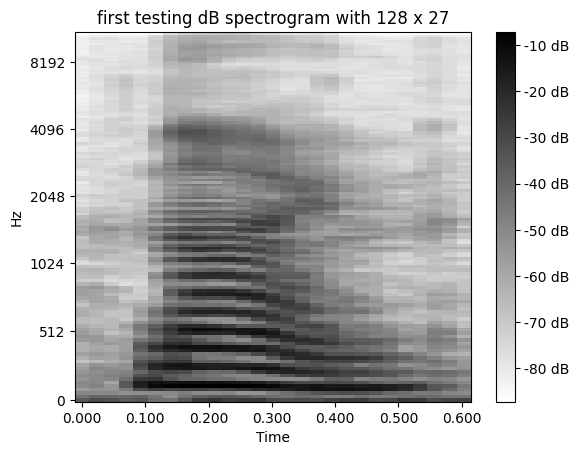

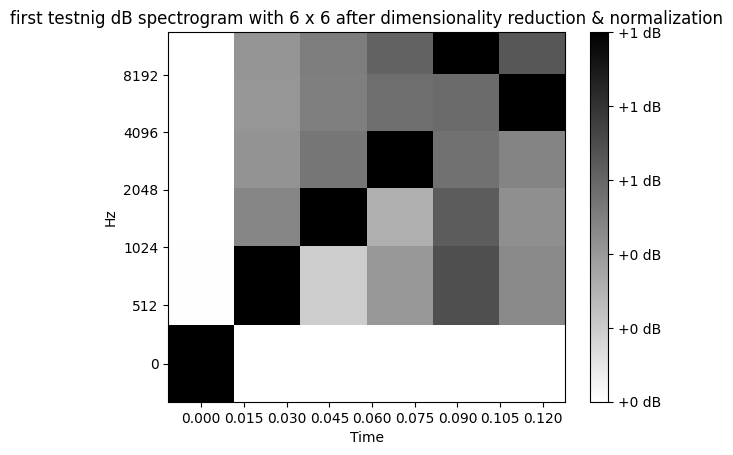

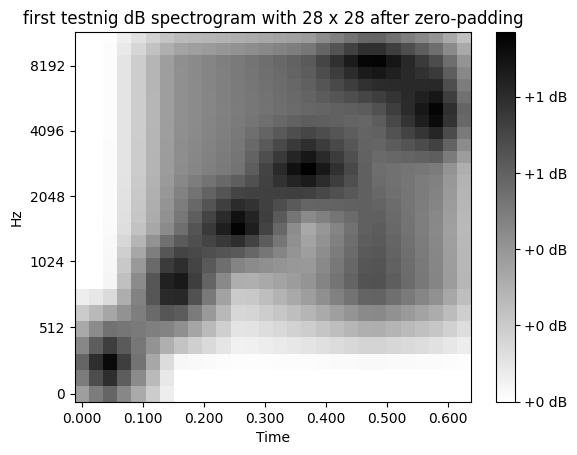

[0.53126438 0.73513209 0.84715172 0.9279611  0.95408296 0.96526902]
[0.53126438 0.73513209 0.84715172 0.9279611  0.95408296 0.96526902]


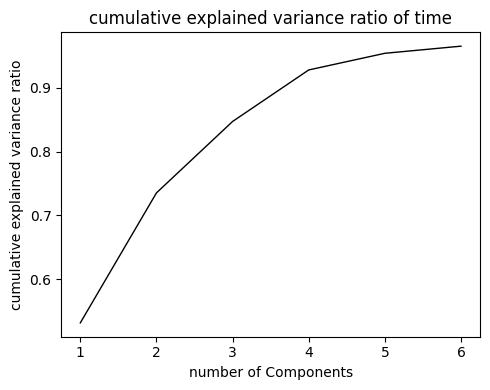

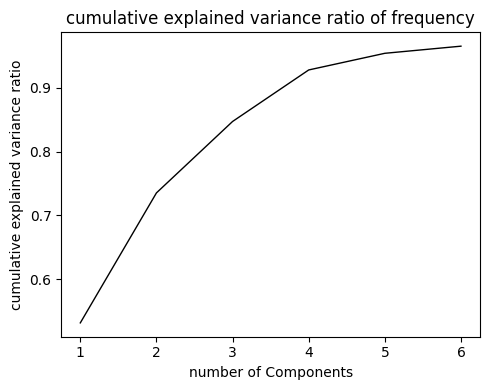

number of components to retain critical features for the time domain: 5
number of components to retain critical features for the frequency domain: 5


In [ ]:
#### block 5 ####
#### audio MNIST test data preperation ####

# data_dir_au_test = r'D:\Song\University\대학강의\Home Assignment & Project\Pysics-informed machine learning\MNIST data\30000 Audios\testing'
data_dir_au_test = r'/home/deepapp01/audio_dataset/70000_train_test/test' # path to the subdirectory before '0-9'
sub_dir_test = os.listdir(data_dir_au_test) # List all target subdirectories of '0-9'

x_test_sp_db = [] # initialize empty lists for dB sepctrograms and their corresponding labels
y_test_sp_db = []

x_test_sp_db_pca_nor = [] # initialize empty lists for dB sepctrograms and their corresponding labels after dimension reduction and normalization
y_test_sp_db_pca_nor = [] # 'pca' stands for 'Principal Component Analysis'

x_test_sp_db_pca_nor_pad = [] # initialize empty lists for dB sepctrograms and their corresponding labels after zero-padding
y_test_sp_db_pca_nor_pad = []

# Loop over each subdirectory from 0 to 9
for i in sub_dir_test: # extract target subdirectories from 0 to 9
    sub_dir_test_path = os.path.join(data_dir_au_test, i) # join the path and each target subdirectory from 0 to 9
    audio_files = os.listdir(sub_dir_test_path) # list all audio signals in a target 'i' subdirectory

    # Loop over each audio signal in a target subdirectory
    for j in audio_files: # extract all signals from each target subdirectiry
        audio_path = os.path.join(sub_dir_test_path, j) # join a target 'i' subdirectory and its audio file
        audio, sr = librosa.load(audio_path, dtype = 'float32') # Load each audio file and sample rate using librosa
        #print(audio.dtype)
        #print(sr)

        spectrogram = librosa.feature.melspectrogram (y = audio, sr = sr) # convert each audio signal to a grayscale spectrogram
                      # compute mel spectrograms using Short-Time Fourier Transform(STFT) in librosa library.
                      # For the mel spectrogram, x is time domain, y is frequency domain, and z indicates amplitude or power
                      # For computing z-axis values, use the power(P) or the amplitude(A) of signal: P(time, frequency) = |A(time, frequency)|^2,
                      # Here, mel spectrograms mean 'power spectrograms' with power z-axis
        spectrogram_db = librosa.power_to_db(spectrogram) # convert power spectrograms to dB scaled spectrograms which have dB scaled z-axis

        x_test_sp_db.append(spectrogram_db) # append each original dB spectrogram and its corresponding label to lists
        y_test_sp_db.append(int(i))

        #print(spectrogram_db)
        #print(int(i))
        #print(spectrogram_db.shape)

        # limit component_time and component_freq to equal or be smaller than the min pixel number of 'spectrogram_db'
        x_pixel_num = spectrogram_db.shape[1] # compute the min pixel number of 'spectrogram_db' through x and y
        y_pixel_num = spectrogram_db.shape[0]
        pix_value_min = min(x_pixel_num, y_pixel_num)
        #print(pix_value_min)

        # compute the max number of component_time and component_freq
        component_max = max(component_time, component_freq)

        if component_max > pix_value_min: # if component_max is greater than pix_value_min, then stop the code execution.
            print(f"You should set both component_time and component_freq to equal or be smaller than {pix_value_min}")
            sys.exit()

        # dimensionality reduction
        component_time = component_time # define the number of time components you want to keep (you can adjust this depending on your task)
        pca_time = PCA(n_components = component_time, svd_solver = 'auto') # 'pca' stands for 'Principal Component Analysis'
        spectrogram_db_pca_time = pca_time.fit_transform(spectrogram_db.T).T

        component_freq = component_freq # define the number of frequency components you want to keep (you can adjust this depending on your task)
        pca_freq = PCA(n_components = component_freq, svd_solver = 'auto')
        spectrogram_db_pca_freq_time = pca_freq.fit_transform(spectrogram_db_pca_time)
        spectrogram_db_pca_freq_time = spectrogram_db_pca_freq_time.T

        # normalize spectrogram_db_pca_freq_time between 0 and 1
        scaler = MinMaxScaler() # 'spectrogram_db_pca_freq_time' is a 2D array
        spectrogram_db_pca_freq_time_nor = scaler.fit_transform(spectrogram_db_pca_freq_time)

        x_test_sp_db_pca_nor.append(spectrogram_db_pca_freq_time_nor) # append each dB spectrogram and its corresponding label to lists
        y_test_sp_db_pca_nor.append(int(i))

        #print(spectrogram_db_pca_freq_time_nor)
        #print(int(i))
        #print(spectrogram_db_pca_freq_time_nor.shape)
        #print('..........')

        # apply zero-padding to spectrogram_db_pca_freq_time_nor
        target_size = (input_img_heg, input_img_wid) # determine a target size of the spectrograms for zero-padding
        spectrogram_db_pca_freq_time_nor_pad = resize(spectrogram_db_pca_freq_time_nor, target_size, mode = 'constant', anti_aliasing = False)

        x_test_sp_db_pca_nor_pad.append(spectrogram_db_pca_freq_time_nor_pad) # append each dB spectrogram and its corresponding label to lists
        y_test_sp_db_pca_nor_pad.append(int(i))

        #print(spectrogram_db_pca_freq_time_nor_pad)
        #print(int(i))
        #print(spectrogram_db_pca_freq_time_nor_pad.shape)
        #print('..........')

#print(x_test_sp_db)
#print(x_test_sp_db_pca_nor)

# draw an original testing dB spectrogram
first_channel = x_test_sp_db[0] # first tensor of x_test_sp (index = 0)
n_freq, n_time = first_channel.shape
librosa.display.specshow(first_channel, x_axis = 'time', y_axis = 'mel', cmap = 'gray_r') # y_axis = 'mel' indicates mel frequency bands
plt.title('first testing dB spectrogram with {} x {}'.format(n_freq, n_time))
plt.colorbar(format = '%+2.0f dB')  # add a bar to show the dB scale
plt.show()

# draw a testing dB spectrogram after dimensionality reduction and normalization
first_channel = x_test_sp_db_pca_nor[0]
n_freq, n_time = first_channel.shape
librosa.display.specshow(first_channel, x_axis = 'time', y_axis = 'mel', cmap = 'gray_r')
plt.title('first testnig dB spectrogram with {} x {} after dimensionality reduction & normalization'.format(n_freq, n_time))
plt.colorbar(format = '%+2.0f dB')
plt.show()

# draw a testing dB spectrogram after zero-padding
first_channel = x_test_sp_db_pca_nor_pad[0]
n_freq, n_time = first_channel.shape
librosa.display.specshow(first_channel, x_axis = 'time', y_axis = 'mel', cmap = 'gray_r')
plt.title('first testnig dB spectrogram with {} x {} after zero-padding'.format(n_freq, n_time))
plt.colorbar(format = '%+2.0f dB')
plt.show()

# convert a list (x_test_sp_db_pca_nor_pad) to a TensorFlow tensor
x_test_sp_db_pca_nor_pad = tf.convert_to_tensor(x_test_sp_db_pca_nor_pad)

#print(x_test_sp_db_pca_nor_pad.shape)

# compute explained variance ratio as one of quantitative metrics to show how the resized inputs are still imformative
n_samples, n_freq, n_time = x_test_sp_db_pca_nor_pad.shape
x_test_sp_db_pca_nor_pad_2d = tf.reshape(x_test_sp_db_pca_nor_pad, [n_samples, -1]) # reshape a 3D thensor to a 2D one

#print(n_samples)
#print(n_freq)
#print(n_time)
#print(x_test_sp_db_pca_nor_pad_2d.shape)

pca_time.fit(x_test_sp_db_pca_nor_pad_2d) # fit PCA to the resized inputs
pca_freq.fit(x_test_sp_db_pca_nor_pad_2d)

variance_ratio_time = pca_time.explained_variance_ratio_ # calculate explained variance ratio for each PCA model
variance_ratio_freq = pca_freq.explained_variance_ratio_

explained_variance_ratio_time = np.cumsum(variance_ratio_time) # calculate  cumulative explained sum of explained variance ratio for each PCA model
explained_variance_ratio_freq = np.cumsum(variance_ratio_freq)

print(explained_variance_ratio_time)
print(explained_variance_ratio_freq)

# plot the cumulative explained variance ratio (time)
plt.figure(figsize = (5, 4))
plt.plot(np.arange(1, len(explained_variance_ratio_time) + 1), explained_variance_ratio_time, color = 'black', label = 'time', linewidth = 1.0)
plt.title('cumulative explained variance ratio of time')
plt.xlabel('number of Components')
plt.ylabel('cumulative explained variance ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio_time) + 1))  # set the x-axis to start from 1
plt.tight_layout()
plt.show()

# plot the cumulative explained variance ratio (frequency)
plt.figure(figsize = (5, 4))
plt.plot(np.arange(1, len(explained_variance_ratio_freq) + 1), explained_variance_ratio_freq, color = 'black', label = 'Frequency', linewidth = 1.0)
plt.title('cumulative explained variance ratio of frequency')
plt.xlabel('number of Components')
plt.ylabel('cumulative explained variance ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio_freq) + 1))  # set the x-axis to start from 1
plt.tight_layout()
plt.show()

n_components_time = np.argmax(explained_variance_ratio_time >= 0.95) + 1 # find the first number of components (index) that meets or exceeds 95% of the variance value
n_components_freq = np.argmax(explained_variance_ratio_freq >= 0.95) + 1

print(f"number of components to retain critical features for the time domain: {n_components_time}") # print component number
print(f"number of components to retain critical features for the frequency domain: {n_components_freq}")

### Check the shape of each set

In [ ]:
# Check the shape
print(f"training spectrogram' shape after normalization: {x_train_sp_db_pca_nor_pad_2d.shape}")
print(f"test spectrogram' shape after normalization: {x_test_sp_db_pca_nor_pad_2d.shape}")
print('........................................................................')
print(f"training spectrogram' type after normalization: {type(x_train_sp_db_pca_nor_pad_2d)}")
print(f"test spectrogram' type after normalization: {type(x_test_sp_db_pca_nor_pad_2d)}")
print('........................................................................')

training spectrogram' shape after normalization: (60000, 784)
test spectrogram' shape after normalization: (10000, 784)
........................................................................
training spectrogram' type after normalization: <class 'tensorflow.python.framework.ops.EagerTensor'>
test spectrogram' type after normalization: <class 'tensorflow.python.framework.ops.EagerTensor'>
........................................................................


### Save the spectrogram

In [ ]:
# Save x train sp
np.save("/home/deepapp01/dechathon/x_train_sp_db_pca_nor_pad_2d.npy", x_train_sp_db_pca_nor_pad_2d)
# Save x test sp
np.save("/home/deepapp01/dechathon/x_test_sp_db_pca_nor_pad_2d.npy", x_test_sp_db_pca_nor_pad_2d)
# Save y train sp
np.save("/home/deepapp01/dechathon/y_train_sp_db_pca_nor_pad.npy", y_train_sp_db_pca_nor_pad)
# Save y test sp
np.save("/home/deepapp01/dechathon/y_test_sp_db_pca_nor_pad.npy", y_test_sp_db_pca_nor_pad)

## Tensor Fusion

### Import necessary libraries

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Lambda, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import keras_tuner as kt
#from keras_tuner import HyperParameters
import os
import librosa
import soundfile as sf
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import sys
import librosa.display

%matplotlib inline
from IPython.display import Image
PATH = "/Users/User/Desktop/Deep learning codes/"

2023-11-05 16:02:01.373562: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 16:02:01.374667: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 16:02:01.375002: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 16:02:01.406996: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Set random seed and variables

In [ ]:
#### block 1 ####
#### set random seed for reproducibility ####
np.random.seed(1234)
tf.random.set_seed(1234)

ini_1 = initializers.RandomNormal(stddev = 0.01)
ini_2 = initializers.GlorotNormal(seed = 1234)
ini_3 = initializers.GlorotUniform(seed = 1234)
ini_4 = initializers.HeNormal()
ini_5 = initializers.HeUniform()
ini_6 = initializers.Constant(value = 0.5)
ini_7 = initializers.TruncatedNormal(mean = 0.0 ,stddev = 0.05)
ini_8 = initializers.VarianceScaling()

act_1 = 'tanh'
act_2 = 'relu'
act_3 = 'sigmoid'
act_4 = 'linear'
act_5 = 'softmax'
act_6 = 'elu'
act_7 = 'swish'
act_8 = 'softmax'


### Initialize Hyperparameters

In [ ]:
#### block 2 ####
#### initialize hyperparameters ####
learning_rate = 0.01
batch_size = 32
num_epochs = 200

input_img_heg = 28 # dimension of original images
input_img_wid = 28

# use them for demensionality reduction (dowm sizing) of db spectrograms
component_time = 6 # these components must be smaller than the samllest number of time and freqency of original spectrograms.
component_freq = 6 # component_freq =< component_time


### Load dataset sp

In [ ]:
x_train_sp_db_pca_nor_pad_2d = np.load("/home/deepapp01/dechathon/x_train_sp_db_pca_nor_pad_2d.npy")
x_test_sp_db_pca_nor_pad_2d = np.load("/home/deepapp01/dechathon/x_test_sp_db_pca_nor_pad_2d.npy")
y_train_sp_db_pca_nor_pad = np.load("/home/deepapp01/dechathon/y_train_sp_db_pca_nor_pad.npy")
y_test_sp_db_pca_nor_pad = np.load("/home/deepapp01/dechathon/y_test_sp_db_pca_nor_pad.npy")

### Prepare the MNIST data for tensor fusion

In [ ]:
## Set the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Load MNIST data

x_train = x_train.astype('float32') / 255.0 # normalize MNIST data between 0 and 1
x_test = x_test.astype('float32') / 255.0

# Convert the lists to TensorFlow tensors
x_train_img = tf.convert_to_tensor(x_train)
y_train_img = tf.convert_to_tensor(y_train)
x_test_img = tf.convert_to_tensor(x_test)
y_test_img = tf.convert_to_tensor(y_test)

# Sort the dataset in ascending order of y_train and y_test
sorted_indices_train = tf.argsort(y_train_img, axis=0)
x_train_img = tf.gather(x_train_img, sorted_indices_train)
y_train_img = tf.gather(y_train_img, sorted_indices_train)
sorted_indices_test = tf.argsort(y_test_img, axis=0)
x_test_img = tf.gather(x_test_img, sorted_indices_test)
y_test_img = tf.gather(y_test_img, sorted_indices_test)

# Convert the tensors back to numpy arrays
x_train_img = x_train_img.numpy()
y_train_img = y_train_img.numpy()
x_test_img = x_test_img.numpy()
y_test_img = y_test_img.numpy()

2023-11-05 16:02:18.907833: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 77803 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:09:00.0, compute capability: 8.0
2023-11-05 16:02:18.910471: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78515 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:46:00.0, compute capability: 8.0
2023-11-05 16:02:18.911614: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 24685 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:85:00.0, compute capability: 8.0
2023-11-05 16:02:18.913708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 78517 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-80GB, pci bu

training images' shape after normalization: (60000, 28, 28)
test images' shape after normalization: (10000, 28, 28)
........................................................................
training images' type after normalization: <class 'numpy.ndarray'>
test images' type after normalization: <class 'numpy.ndarray'>
........................................................................


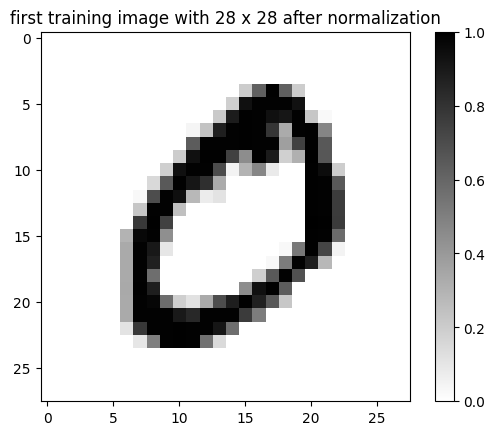

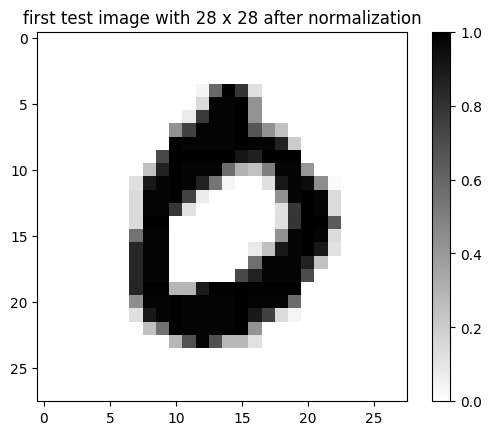

In [ ]:
print(f"training images' shape after normalization: {x_train_img.shape}")
print(f"test images' shape after normalization: {x_test_img.shape}")
print('........................................................................')
print(f"training images' type after normalization: {type(x_train_img)}")
print(f"test images' type after normalization: {type(x_test_img)}")
print('........................................................................')

# draw images with 28 x 28 before resizing
first_channel_tr = x_train_img[0] # first channel of x_train (index = 0)
plt.imshow(first_channel_tr, cmap = 'gray_r')
plt.title('first training image with 28 x 28 after normalization')
plt.colorbar()
plt.show()

first_channel_test = x_test_img[0] # first channel of x_test (index = 0)
plt.imshow(first_channel_test, cmap = 'gray_r')
plt.title('first test image with 28 x 28 after normalization')
plt.colorbar()
plt.show()

### Tensor fusion

In [ ]:
# Define tensor fusion function
def tensor_fusion(image, spectrogram):
    # Flatten the image
    image_flat = tf.reshape(image, [len(image), -1]).numpy()
    # Additive and Concatenate
    additive = spectrogram + image_flat
    concatenate = np.concatenate((spectrogram, image_flat), axis = 1)
    print(f'Shape after additive {image} and {spectrogram}: {additive.shape}')
    print(f'Shape after concatenate {image} and {spectrogram}: {concatenate.shape}')
    
    image_flat = image_flat.astype('float16')
    spectrogram = spectrogram.astype('float16')
    # Multiplication fusion
    multiplicative = np.array([np.column_stack(
                                        (
                                        np.append(image_flat[i],np.ones((1,1),dtype="float16")),
                                        np.append(
                                            np.outer(image_flat[i],spectrogram[i]),
                                            [spectrogram[i]],
                                            axis=0
                                            )
                                        )
                                    ) 
                                    for i in range(0, len(image))])

    return multiplicative

### Tensor test set

In [ ]:
x_test_tf = tensor_fusion(x_test_img, x_test_sp_db_pca_nor_pad_2d)

Shape after additive [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0

tensor fusion' shape after normalization: (10000, 785, 785)
........................................................................
tensor fusion' type after normalization: <class 'numpy.ndarray'>


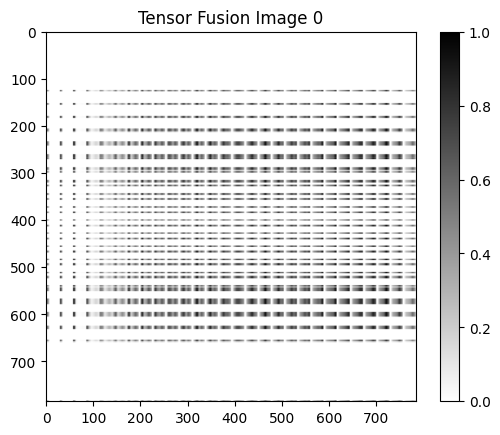

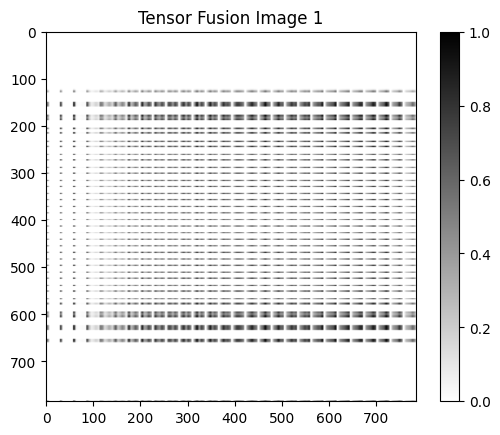

In [ ]:
# Plot the x_test_tf
print(f"tensor fusion' shape after normalization: {x_test_tf.shape}")
print('........................................................................')
print(f"tensor fusion' type after normalization: {type(x_test_tf)}")
# Save x test
np.save( r"/home/deepapp01/dechathon/"+ 'x_test_set.npy', x_test_tf)
# Save y test
np.save( r"/home/deepapp01/dechathon/"+ 'y_test_set.npy', y_test_sp_db_pca_nor_pad)
for i in range(0,2):
  plt.imshow(x_test_tf[i], cmap = 'gray_r')
  plt.title('Tensor Fusion Image '+ str(i))
  plt.colorbar()
  plt.show()

### Tensor train set

In [ ]:
print(x_train_img.shape)
print(x_train_sp_db_pca_nor_pad_2d.shape)
x_train_tf = tensor_fusion(x_train_img, x_train_sp_db_pca_nor_pad_2d)

(60000, 28, 28)
(60000, 784)
Shape after additive [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ..

tensor fusion' shape after normalization: (60000, 785, 785)
........................................................................
tensor fusion' type after normalization: <class 'numpy.ndarray'>


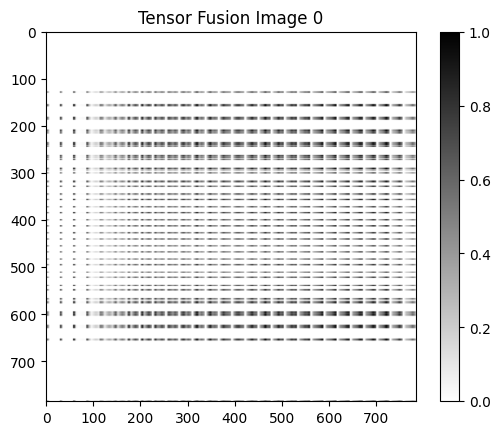

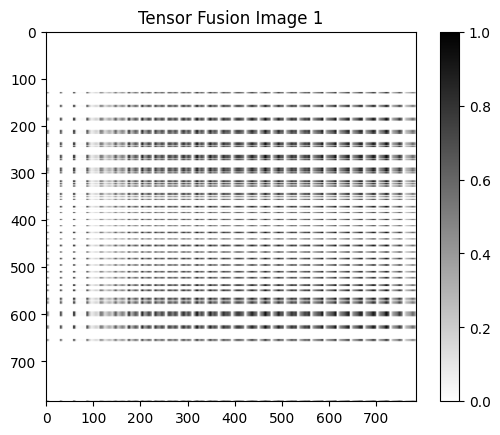

In [ ]:
# Plot the x_train_tf
print(f"tensor fusion' shape after normalization: {x_train_tf.shape}")
print('........................................................................')
print(f"tensor fusion' type after normalization: {type(x_train_tf)}")
# Save x train_val
np.save( r"/home/deepapp01/dechathon/"+ 'x_train_tf.npy', x_train_tf)
# Save y train_val
np.save( r"/home/deepapp01/dechathon/"+ 'y_train_sp_db_pca_nor_pad.npy', y_train_sp_db_pca_nor_pad)
for i in range(0,2):
  plt.imshow(x_train_tf[i], cmap = 'gray_r')
  plt.title('Tensor Fusion Image '+ str(i))
  plt.colorbar()
  plt.show()

### Split train and validate set

In [ ]:
x_test_tf = np.load("/home/deepapp01/dechathon/y_test_set.npy")
x_train_tf = np.load("/home/deepapp01/dechathon/x_train_tf.npy")
y_train_sp_db_pca_nor_pad = np.load("/home/deepapp01/dechathon/y_train_sp_db_pca_nor_pad.npy")
# Create a validate dataset from training set
x_train_tensor, x_val_tensor, y_train_tensor, y_val_tensor = train_test_split(x_train_tf, y_train_sp_db_pca_nor_pad, test_size = 0.1, random_state = 0)
print("training x:", x_train_tensor.shape)
print("training y:", np.array(y_train_tensor).shape)

print("validate x:", x_val_tensor.shape)
print("validate y:", np.array(y_val_tensor).shape)

print("testing x:", x_test_tf.shape)
print("testing y:", np.array(y_test_sp_db_pca_nor_pad).shape) # Select 1000 sample

training x: (54000, 785, 785)
training y: (54000,)
validate x: (6000, 785, 785)
validate y: (6000,)
testing x: (10000,)
testing y: (10000,)


### Save the dataset

In [ ]:

# Save x train
np.save( r"/home/deepapp01/dechathon/"+ 'x_train_set.npy', x_train_tensor)
# Save x validate
np.save( r"/home/deepapp01/dechathon/"+ 'x_val_set.npy', x_val_tensor)
# Save y train
np.save( r"/home/deepapp01/dechathon/"+ 'y_train_set.npy', y_train_tensor)
# Save y validate
np.save( r"/home/deepapp01/dechathon/"+ 'y_val_set.npy', y_val_tensor)


## Final 2

### Import necessary libraries

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from pathlib import Path
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import initializers
from keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2023-11-05 07:20:30.960522: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 07:20:30.960611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 07:20:30.966334: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 07:20:31.144976: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# set random seed for reproducibility
#np.random.seed(1234)
#tf.random.set_seed(1234)

ini_1 = initializers.RandomNormal(stddev = 0.01)
ini_2 = initializers.GlorotNormal(seed = 1234)
ini_3 = initializers.GlorotUniform(seed = 1234)
ini_4 = initializers.HeNormal()
ini_5 = initializers.HeUniform()
ini_6 = initializers.Constant(value = 0.5)
ini_7 = initializers.TruncatedNormal(mean = 0.0 ,stddev = 0.05)
ini_8 = initializers.VarianceScaling()

act_1 = 'tanh'
act_2 = 'relu'
act_3 = 'sigmoid'
act_4 = 'linear'
act_5 = 'softmax'
act_6 = 'elu'
act_7 = 'swish'
act_8 = 'softmax'

In [4]:
# Check if the gpu is working or not

physical_devices = tf.config.list_physical_devices('GPU')
if not physical_devices:
    raise RuntimeError("No GPU devices found.")
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus_to_use = physical_devices[1]
tf.config.experimental.set_visible_devices(gpus_to_use, 'GPU')

### Load the dataset

In [5]:
# Download the dataset

x_train = np.load("/home/deepapp01/dechathon/x_train_set.npy")
y_train = np.load("/home/deepapp01/dechathon/y_train_set.npy")
x_val = np.load("/home/deepapp01/dechathon/x_val_set.npy")
y_val = np.load("/home/deepapp01/dechathon/y_val_set.npy")
x_test = np.load("/home/deepapp01/dechathon/x_test_set.npy")
y_test = np.load("/home/deepapp01/dechathon/y_test_set.npy")

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Check the shape of dataset

x_train.shape, x_val.shape, x_test.shape, y_train.shape , y_val.shape, y_test.shape

((54000, 785, 785),
 (6000, 785, 785),
 (10000, 785, 785),
 (54000, 10),
 (6000, 10),
 (10000, 10))

### Reshape the dimension of the dataset

In [7]:
# Add the dimension for grayscale channel

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], x_val.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [8]:
x_train.dtype, x_val.dtype, x_test.dtype

(dtype('float16'), dtype('float16'), dtype('float16'))

In [9]:
x_train.shape, x_val.shape, x_test.shape

((54000, 785, 785, 1), (6000, 785, 785, 1), (10000, 785, 785, 1))

### Create the CNN model

In [10]:
# Create the CNN model

input_shape = x_train[0].shape
num_classes = 10

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu", kernel_initializer=initializers.GlorotUniform(seed=1234), input_shape=(785,785, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', kernel_initializer = initializers.GlorotUniform(seed = 1234)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu", kernel_initializer=initializers.GlorotUniform(seed=1234)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", kernel_initializer=initializers.GlorotUniform(seed=1234)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu", kernel_initializer=initializers.GlorotUniform(seed=1234)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation="relu", kernel_initializer=initializers.GlorotUniform(seed=1234)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

2023-11-05 07:24:58.945872: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79114 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:46:00.0, compute capability: 8.0


In [11]:
# Compile the model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Summarize the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 781, 781, 32)      832       
                                                                 
 batch_normalization (Batch  (None, 781, 781, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 390, 390, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 388, 388, 32)      9248      
                                                                 
 dropout (Dropout)           (None, 388, 388, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 384, 384, 64)      5

In [13]:
# Define loss function

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [14]:
learning_rate = 0.01
num_epochs = 1000
epochs = 1000
batch_size = 32
datagen = ImageDataGenerator(
          featurewise_center = False,  # set input mean to 0 over the dataset
          samplewise_center = False,  # set each sample mean to 0
          featurewise_std_normalization = False,  # divide inputs by std of the dataset
          samplewise_std_normalization = False,  # divide each input by its std
          zca_whitening = False,  # apply ZCA whitening
          rotation_range = 0,  # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0, # Randomly zoom image
          width_shift_range = 0,  # randomly shift images horizontally (fraction of total width)
          height_shift_range = 0,  # randomly shift images vertically (fraction of total height)
        #   shear_range = 0.1,  # set range for random shear
          horizontal_flip = False,  # randomly flip images
          vertical_flip = False,
          dtype='float16' )  # randomly flip images

# # They generate the augmented batches from original data during the model training.  
train_gen = datagen.flow(x_train, y_train, batch_size = batch_size)
val_gen = datagen.flow(x_val, y_val, batch_size = batch_size)

In [15]:
# Early stopping 
es = tf.keras.callbacks.EarlyStopping(
        monitor = "val_accuracy", # metrics to monitor
        patience = 10, # number of consecutive epochs before stop when the val_accuracy does not improve.
        verbose = 1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights = True, 
     )

# Learing scheduling using 'Reduce Learning Rate on Plateau'
rp = tf.keras.callbacks.ReduceLROnPlateau(
        monitor = "val_accuracy",
        factor = 0.2, # controls the degree of learning rate reduction (0.2 * previous learning rate value)
        patience = 3,
        verbose = 1,
        mode = "max",
        min_lr = 0.000000001,
     )

checkpoint_filepath = "model_checkpoint.h5"
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train (fit) the model with callbacks and data augmentation
train_steps = x_train.shape[0] // batch_size # iteration number in a single epoch during training
valid_steps = x_val.shape[0] // batch_size # iteration number in a single epoch during validation


history = model.fit(train_gen,
                    epochs = epochs,
                    steps_per_epoch = train_steps,
                    validation_data = val_gen,
                    validation_steps = valid_steps,
                    callbacks=[es, rp, cp], 
                    )

Epoch 1/1000


2023-11-05 07:25:01.816175: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-05 07:25:05.650465: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-05 07:25:07.346679: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-05 07:25:08.433366: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-05 07:25:11.564420: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efd58049fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-05 07:25:11.564471: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Cap

1687/1687 [==============================] - 763s 423ms/step - loss: 0.1732 - accuracy: 0.9542 - val_loss: 0.0741 - val_accuracy: 0.9759 - lr: 0.0010
Epoch 2/1000
1687/1687 [==============================] - 519s 307ms/step - loss: 0.0846 - accuracy: 0.9746 - val_loss: 0.1007 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 3/1000
1687/1687 [==============================] - 524s 310ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.0672 - val_accuracy: 0.9796 - lr: 0.0010
Epoch 4/1000
1687/1687 [==============================] - 502s 297ms/step - loss: 0.0560 - accuracy: 0.9823 - val_loss: 0.0725 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 5/1000
1687/1687 [==============================] - 506s 300ms/step - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.0657 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 6/1000
1687/1687 [==============================] - 487s 288ms/step - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.1582 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 7/1000
1687/1687 [===========

In [18]:
path_save = Path(r"/home/deepapp01/dechathon/model_saving")

In [19]:
model.save(path_save/"model_dechathon.h5")

/home/deepapp01/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
datagen = ImageDataGenerator(
          featurewise_center = False,  # set input mean to 0 over the dataset
          samplewise_center = False,  # set each sample mean to 0
          featurewise_std_normalization = False,  # divide inputs by std of the dataset
          samplewise_std_normalization = False,  # divide each input by its std
          zca_whitening = False,  # apply ZCA whitening
          rotation_range = 0,  # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0, # Randomly zoom image
          width_shift_range = 0,  # randomly shift images horizontally (fraction of total width)
          height_shift_range = 0,  # randomly shift images vertically (fraction of total height)
        #  shear_range = 0.1,  # set range for random shear
          horizontal_flip = False,  # randomly flip images
          vertical_flip = False,
          dtype='float16' )  # randomly flip images


In [21]:
datagen_test = ImageDataGenerator(dtype='float16')

In [22]:
test_gen = datagen_test.flow(x_test, y_test, batch_size = 64) # Above batch_size = 64

In [23]:
model = load_model(path_save/"model_dechathon.h5")

In [24]:
test_loss, test_acc = model.evaluate(test_gen, verbose = 2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

2023-11-05 12:00:25.272653: W tensorflow/core/kernels/gpu_utils.cc:54] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


157/157 - 67s - loss: 0.0877 - accuracy: 0.9912 - 67s/epoch - 430ms/step

Test accuracy: 0.9911999702453613

Test loss: 0.08768032491207123


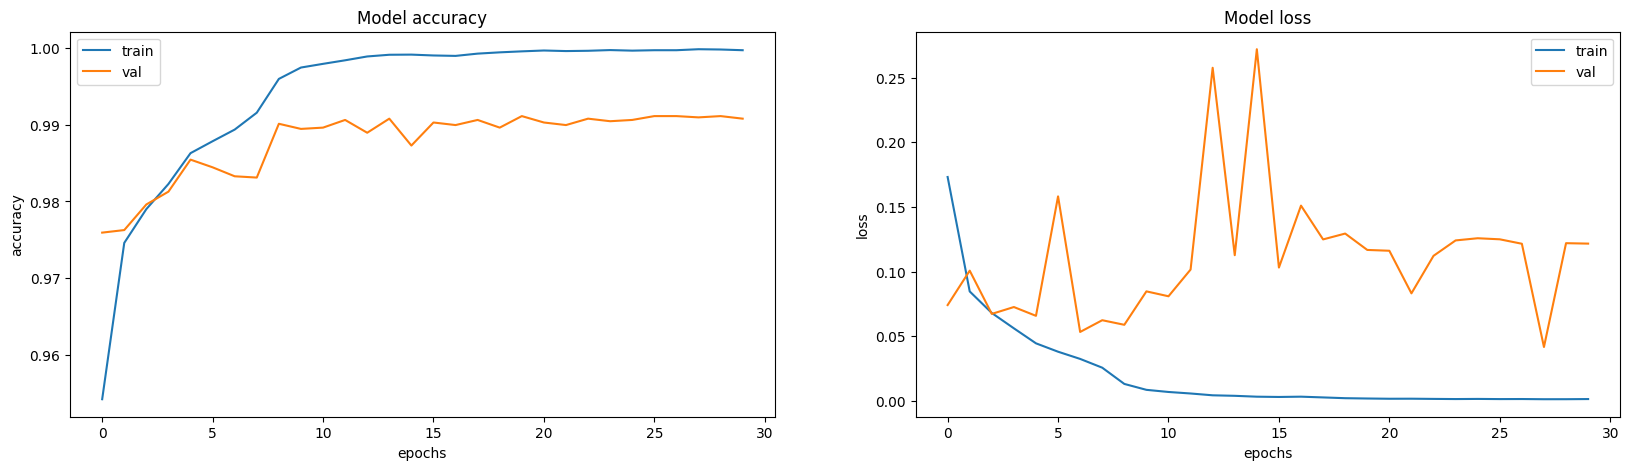

In [25]:
# log_data = pd.read_csv('training.log', sep=',', engine='python') 

def plot_learning_curves(history):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['train', 'val'])

plot_learning_curves(history) 

2023-11-05 12:02:30.120021: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24649000000 exceeds 10% of free system memory.
2023-11-05 12:02:55.569381: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24649000000 exceeds 10% of free system memory.


313/313 [==============================] - 22s 69ms/step


/tmp/ipykernel_3924665/4256895771.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


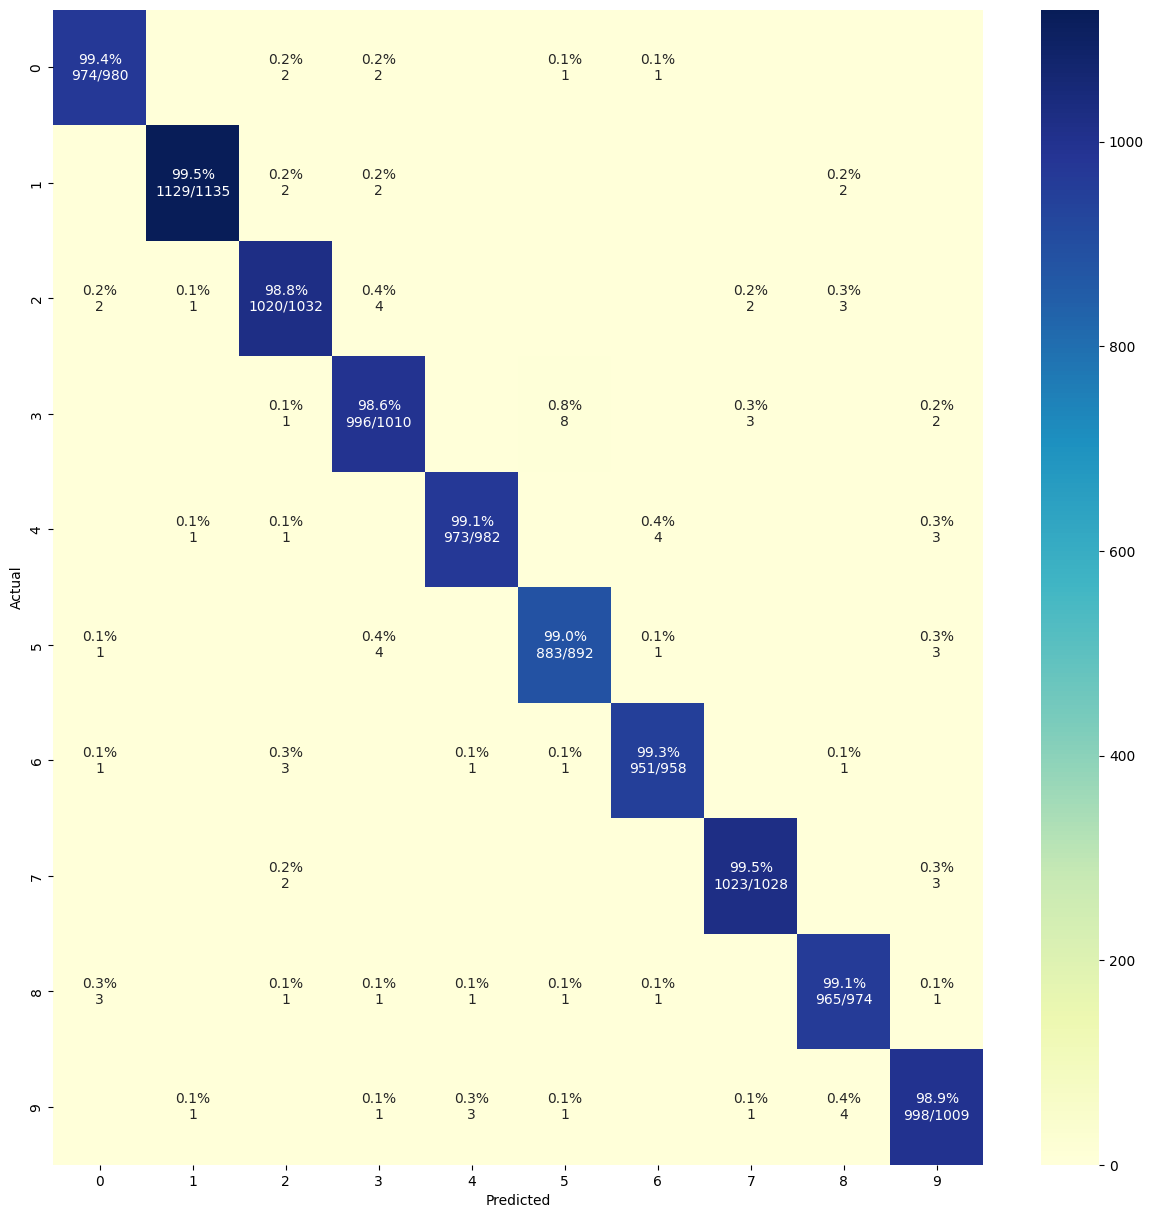

In [26]:
# section 17
# Plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, figsize=(10, 10), text_size=10):
    cm = confusion_matrix(y_true, y_pred)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=classes, columns=classes)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax, annot_kws={"size": text_size})

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
class_names = [str(i) for i in range(10)]
plot_confusion_matrix(y_true, y_pred_classes, classes=class_names, figsize=(15, 15), text_size=10)